In [84]:
from collections import defaultdict
import wandb


api = wandb.Api()

runs = api.runs(path="lad/sed")
def grouped_by_tax(min_length=100):
    grouped_by_tax = defaultdict(list)
    for run in runs:
         if 'charts/mean_episodic_return' in run.history().columns and len(run.history()['charts/mean_episodic_return']) > min_length:
            last_valid_index = run.history()['charts/mean_episodic_return'].last_valid_index()
            last_episodic_return = run.history()["charts/mean_episodic_return"].loc[last_valid_index]
            grouped_by_tax[run.config["fixed_tax"]].append(last_episodic_return)
    return grouped_by_tax

grouped_by_tax = grouped_by_tax()
print(len(grouped_by_tax))

4


In [85]:
def average_return_by_tax_group(groups):
    average_return_by_tax_group = {}
    for tax, returns in groups.items():
        avg_return = sum(returns) / len(returns)
        average_return_by_tax_group[tax] = avg_return
    return average_return_by_tax_group

avg_return = average_return_by_tax_group(grouped_by_tax)
print(avg_return)

{'4': 30.155606905619305, '3': 37.92567116873605, '2': 41.21745000566755, '1': 27.377124786376953}


/var/folders/vn/8zrpqcq50mxgnddhh87m72_80000gn/T/ipykernel_24095/4007060813.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tax_groups, y=avg_returns, palette="viridis")


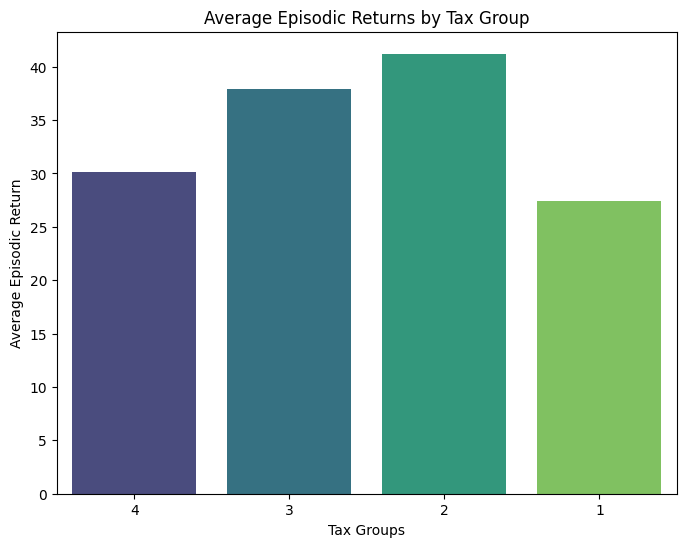

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_return_by_tax_group(avg_return):
    tax_groups = list(avg_return.keys())
    avg_returns = list(avg_return.values())

    plt.figure(figsize=(8,6))
    sns.barplot(x=tax_groups, y=avg_returns, palette="viridis")
    plt.title("Average Episodic Returns by Tax Group")
    plt.xlabel("Tax Groups")
    plt.ylabel("Average Episodic Return")
    plt.show()

plot_return_by_tax_group(avg_return)

In [168]:
def p_mean_taxed_return_by_sigma(runs, min_length=100):
    p_mean_taxed_return_by_sigma = defaultdict(list)
    for run in runs:
        if 'charts/p_mean_taxed_return' in run.history().columns and len(run.history()['charts/p_mean_taxed_return']) > min_length:
            p_mean_taxed_return_by_sigma[run.config["sigma_vals"]].append(run.history()["charts/p_mean_taxed_return"].tolist()[1:min_length])
    return p_mean_taxed_return_by_sigma
p_mean_taxed_return_by_sigma = p_mean_taxed_return_by_sigma(runs)
print(p_mean_taxed_return_by_sigma)


defaultdict(<class 'list'>, {'7': [[12.920966148376465, 32.80421829223633, 50.85715103149414, 65.50733947753906, 86.21040344238281, 100.92742156982422, 115.18910217285156, 129.74639892578125, 152.009521484375, 166.00831604003906, 178.59278869628906, 196.47531127929688, 211.21640014648438, 224.5522003173828, 241.22711181640625, 253.82456970214844, 272.0697326660156, 283.186279296875, 295.85089111328125, 305.363037109375, 320.5643005371094, 335.0032653808594, 350.805419921875, 360.978759765625, 375.8768005371094, 395.1920471191406, 416.520263671875, 437.0672912597656, 454.0962219238281, 474.62420654296875, 489.49456787109375, 505.7564697265625, 524.1135864257812, 547.2261352539062, 563.113525390625, 575.6569213867188, 584.9453125, 594.4542236328125, 613.04248046875, 623.9707641601562, 640.1846313476562, 659.2200927734375, 674.7843017578125, 689.6406860351562, 704.9077758789062, 728.3485107421875, 744.4314575195312, 761.2628784179688, 781.3244018554688, 805.9185180664062, 828.847595214843

In [169]:
import numpy as np
def grouped_p_mean_taxed_return(p_mean_taxed_return_by_sigma):
    average_p_mean_return_by_tax_group = {}
    for sigma, runs in p_mean_taxed_return_by_sigma.items():
        transposed_runs = list(zip(*runs))
        average_p_mean_return_by_tax_group[sigma] = transposed_runs
    return average_p_mean_return_by_tax_group

grouped_p_mean_taxed_return = grouped_p_mean_taxed_return(p_mean_taxed_return_by_sigma)
print(grouped_p_mean_taxed_return)

{'7': [(12.920966148376465, 8.922578811645508, 8.992243766784668), (32.80421829223633, 26.152639389038086, 12.173310279846191), (50.85715103149414, 41.7386474609375, 21.696928024291992), (65.50733947753906, 57.02233123779297, 33.21867752075195), (86.21040344238281, 74.41417694091797, 44.830928802490234), (100.92742156982422, 90.10028076171875, 57.70375442504883), (115.18910217285156, 104.72752380371094, 71.16961669921875), (129.74639892578125, 120.88229370117188, 85.20132446289062), (152.009521484375, 134.519775390625, 101.09902954101562), (166.00831604003906, 147.1085205078125, 120.54225158691406), (178.59278869628906, 160.09014892578125, 137.44229125976562), (196.47531127929688, 169.8079071044922, 149.87644958496094), (211.21640014648438, 187.39785766601562, 165.9031219482422), (224.5522003173828, 200.08993530273438, 193.98971557617188), (241.22711181640625, 213.29855346679688, 217.6879119873047), (253.82456970214844, 231.01808166503906, 241.64137268066406), (272.0697326660156, 245.8

In [171]:
import pandas as pd
def defaultdict_to_df(data):
    records = []
    for sigma, episode in data.items():
        for episode_index, values in enumerate(episode):
            for value in values:
                records.append({'Episode': episode_index, 'Sigma': sigma, 'p_mean_taxed_return': value})
    return pd.DataFrame(records)
grouped_p_mean_taxed_return_by_sigma = defaultdict_to_df(grouped_p_mean_taxed_return)
print(grouped_p_mean_taxed_return_by_sigma)

      Episode Sigma  p_mean_taxed_return
0           0     7            12.920966
1           0     7             8.922579
2           0     7             8.992244
3           1     7            32.804218
4           1     7            26.152639
...       ...   ...                  ...
1480       97     3          2216.250000
1481       97     3          2394.634521
1482       98     3          2078.204590
1483       98     3          2250.692139
1484       98     3          2424.260254

[1485 rows x 3 columns]


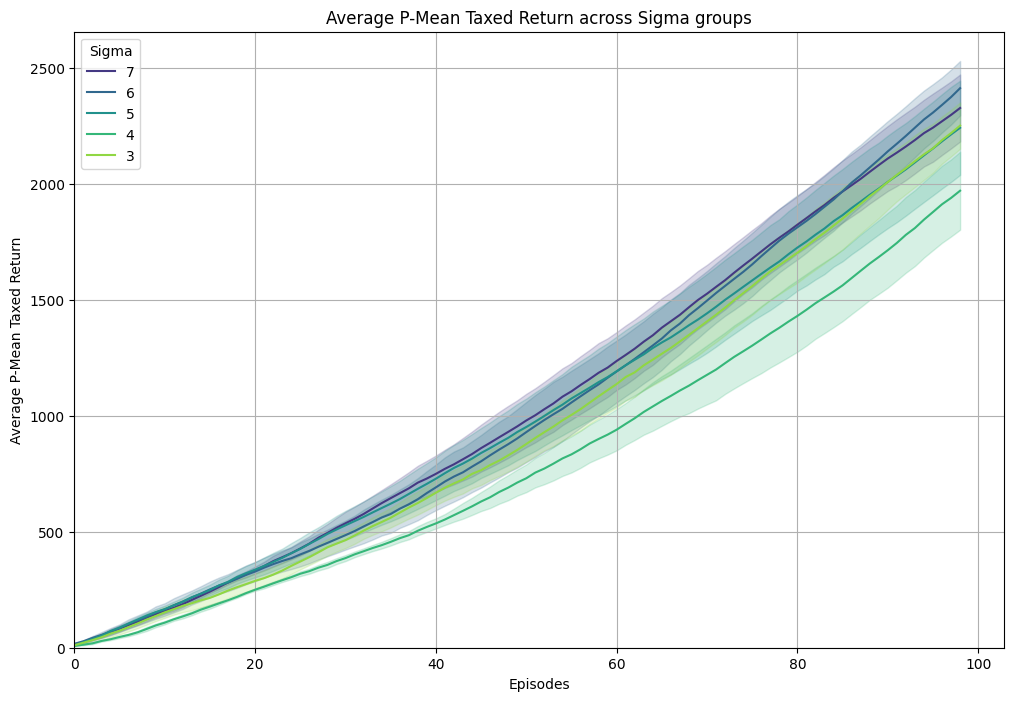

In [198]:
def plot_avg_p_mean_taxed_return_by_sigma(data):
    plt.figure(figsize=(12,8))
    #data = data.loc[data["Sigma"] == '7']
    sigma_groups = data['Sigma'].unique()
    palette = sns.color_palette("viridis", n_colors=len(sigma_groups))  # 'hsv' is just an example
    color_dict = {sigma: color for sigma, color in zip(sigma_groups, palette)}

    sns.lineplot(data=data, x="Episode", y="p_mean_taxed_return", hue="Sigma", dashes=False, palette=color_dict, err_style="band", errorbar="se")
    plt.title(f'Average P-Mean Taxed Return across Sigma groups')
    plt.xlabel('Episodes')
    plt.ylabel('Average P-Mean Taxed Return')
    plt.xlim(left=0,)
    plt.ylim(bottom=0)
    plt.grid(True)
    plt.show()
plot_avg_p_mean_taxed_return_by_sigma(grouped_p_mean_taxed_return_by_sigma)

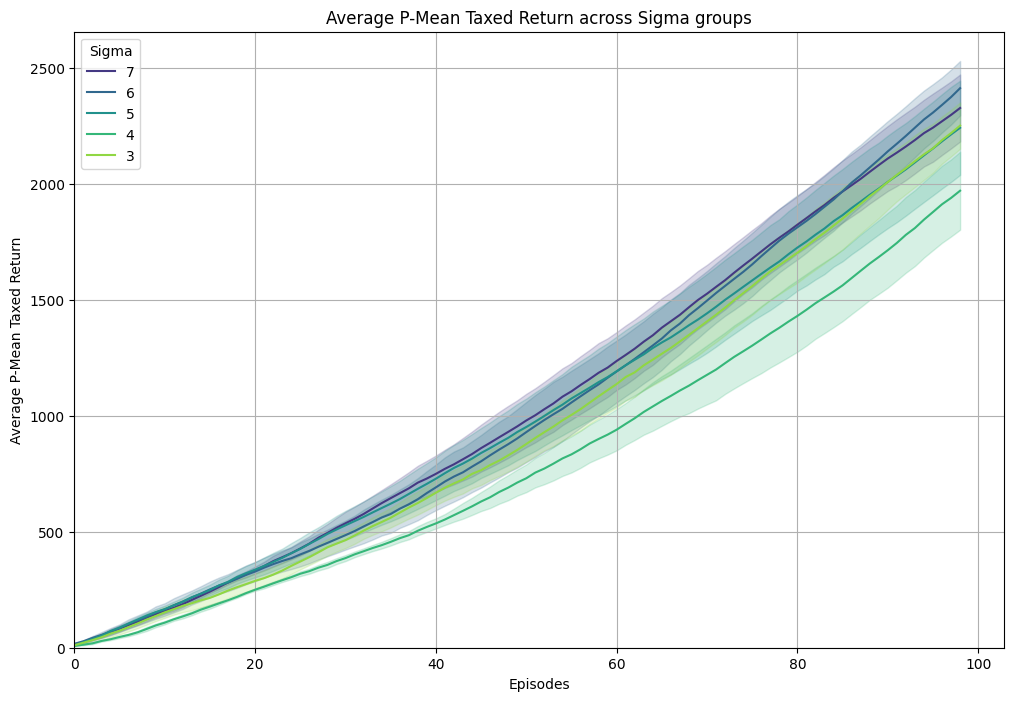

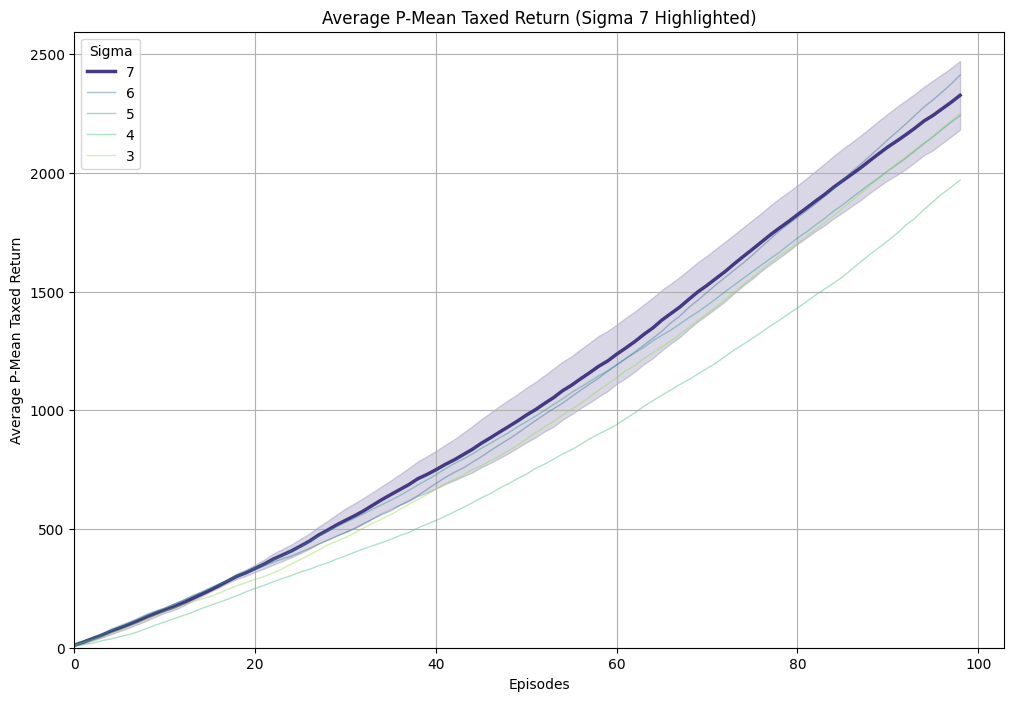

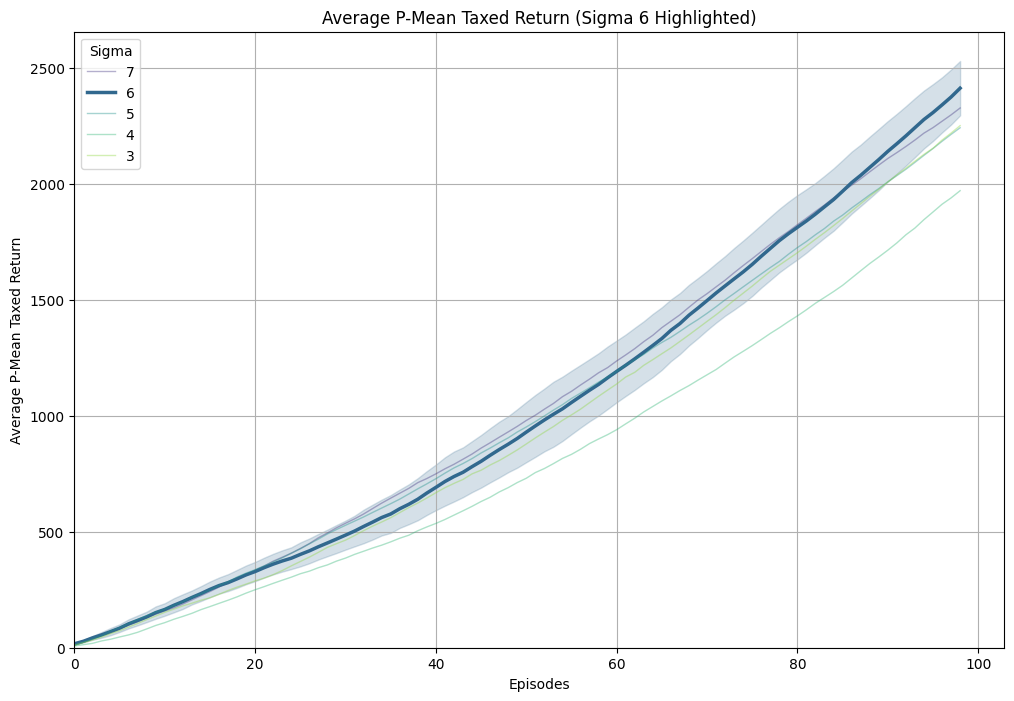

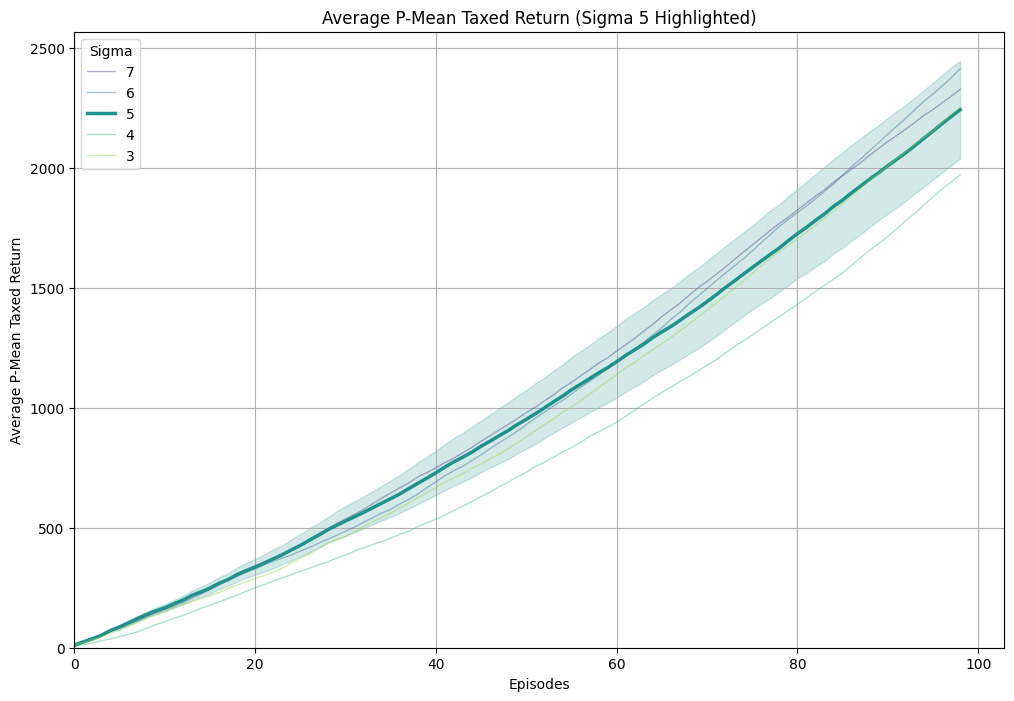

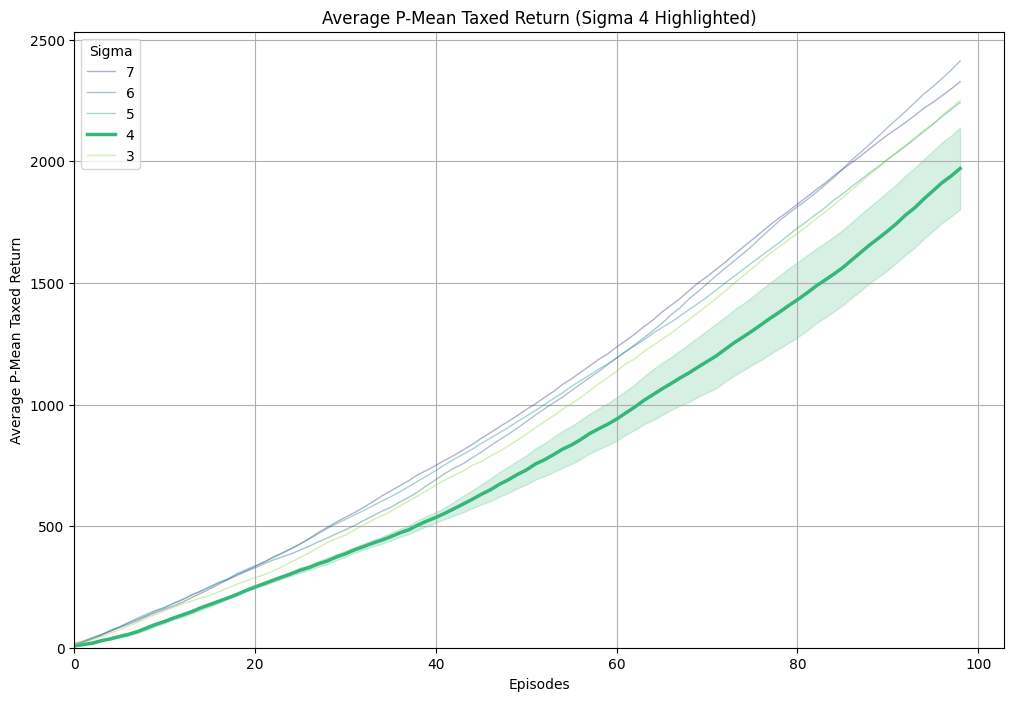

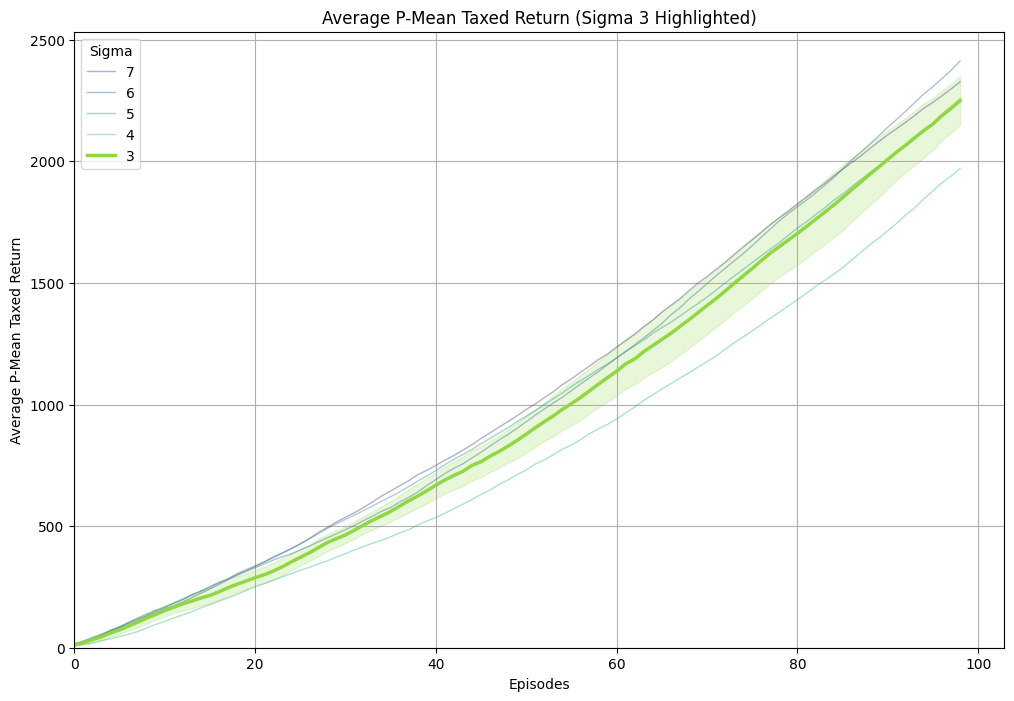

In [204]:
def plot_highlighted_sigma(data):
    sigma_groups = data['Sigma'].unique()
    palette = sns.color_palette("viridis", n_colors=len(sigma_groups))
    color_dict = {sigma: color for sigma, color in zip(sigma_groups, palette)}
    plot_avg_p_mean_taxed_return_by_sigma(data)
    # Iterate through each sigma group to create individual plots
    for highlighted_sigma in sigma_groups:
        plt.figure(figsize=(12, 8))
        # Plot each sigma group
        for sigma in sigma_groups:
            subset = data[data['Sigma'] == sigma]
            if sigma == highlighted_sigma:
                # Highlight the selected sigma group
                sns.lineplot(data=subset, x="Episode", y="p_mean_taxed_return", color=color_dict[sigma], label=f'{sigma}', linewidth=2.5, errorbar='se')
            else:
                # Dim other sigma groups
                sns.lineplot(data=subset, x="Episode", y="p_mean_taxed_return", color=color_dict[sigma], label=f'{sigma}', linewidth=1, errorbar=None, alpha=.4)

        plt.title(f'Average P-Mean Taxed Return (Sigma {highlighted_sigma} Highlighted)')
        plt.xlabel('Episodes')
        plt.ylabel('Average P-Mean Taxed Return')
        plt.xlim(left=0)
        plt.ylim(bottom=0)
        plt.legend(title='Sigma')
        plt.grid(True)
        plt.show()

# Example usage assuming 'grouped_p_mean_taxed_return_by_sigma' is your DataFrame
plot_highlighted_sigma(grouped_p_mean_taxed_return_by_sigma)